In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# <<--- Import Data Set --->>

df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 58.8 KB


## Seperate Dependent and Independent variables

In [5]:
X = df.iloc[:, 1:-1].values
Y = df['Class'].values

## Seperate Data Set into Training Set and Test Set

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25)

## Feature Selection

In [7]:
# <<--- Chi Square test --->>

from sklearn.feature_selection import chi2

chi_square = chi2(x_train, y_train)

d1 = pd.DataFrame(data=zip(df.columns[1:-1], chi_square[0], chi_square[1]), columns=['features', 'Chi Scores', 'P Values'])

In [8]:
filter_mask = (d1['P Values'] <= 0.05)  # Select the columns having p-values greater than 0.05
d1[filter_mask]

,features,Chi Scores,P Values
0,Clump Thickness,475.384255,2.158388e-105
1,Uniformity of Cell Size,1055.695944,1.407015e-231
2,Uniformity of Cell Shape,993.323096,5.076787e-218
3,Marginal Adhesion,750.826928,2.652148e-165
4,Single Epithelial Cell Size,394.439837,8.939909e-88
5,Bare Nuclei,1293.834216,2.472495e-283
6,Bland Chromatin,573.672015,8.923990e-127
7,Normal Nucleoli,849.059380,1.164285e-186
8,Mitoses,179.357636,6.693848e-41


In [9]:
# <<--- F test --->>

from sklearn.feature_selection import f_classif

f_test = f_classif(x_train, y_train)

d2 = pd.DataFrame(data=zip(df.columns[1:-1], f_test[0], f_test[1]), columns=['features', 'f Scores', 'P Values'])

In [10]:
filter_mask = (d1['P Values'] <= 0.05)  # Select the columns having p-values greater than 0.05
d2[filter_mask]

,features,f Scores,P Values
0,Clump Thickness,544.698895,1.672119e-82
1,Uniformity of Cell Size,1105.157635,9.237161e-130
2,Uniformity of Cell Shape,1146.324949,1.498876e-132
3,Marginal Adhesion,511.628997,5.726585e-79
4,Single Epithelial Cell Size,499.091789,1.342852e-77
5,Bare Nuclei,1065.479825,5.279465e-127
6,Bland Chromatin,840.191324,6.761255e-110
7,Normal Nucleoli,519.346266,8.372967e-80
8,Mitoses,116.103673,1.569616e-24


## Logistic Regression

In [11]:
# <<--- Make Model --->>

In [12]:
from sklearn.linear_model import LogisticRegression

lr_regressor = LogisticRegression()
lr_regressor.fit(x_train, y_train)
predicted_values = lr_regressor.predict(x_test)

In [13]:
# <<--- Validate the Model --->>

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}')

Accuracy: 0.9590643274853801

Confusion Matrix: 
[[106   5]
 [  2  58]]


In [15]:
# <<--- Precision, Recall, F1-Score --->>

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       111
           4       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## ROC Curve and AUC

In [16]:
# ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresh1 = roc_curve(y_test, predicted_values, pos_label=4)

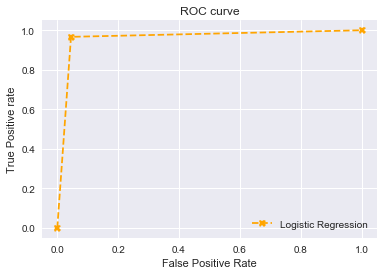

In [17]:
# Plot the roc curve

plt.plot(fpr, tpr, linestyle='--',color='orange', marker='X',label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [18]:
# AUC Score

from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, predicted_values)

print('AUC Score: ', auc_score)

AUC Score:  0.9608108108108109


## K-Fold cross Validation

In [19]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = lr_regressor, X = x_train, y = y_train, cv = 10)

print(f"Average Accuracy: {round(accuracies.mean()*100, 2)} %")
print(f"Standard Deviation: {round(accuracies.std()*100, 2)} %")

Accuracy: 96.67 %
Standard Deviation: 2.16 %


## Save Model

In [20]:
import pickle  

with open('Model.txt','wb') as f:
    pickle.dump(lr_regressor, f)